In [46]:
import numpy as np
import pandas as pd
import klib
import miceforest as mf
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

pd.options.display.max_columns = 200

In [47]:
df = pd.read_csv('./2021_data/TrainingWiDS2021.csv')
df = df.drop(columns=['Unnamed: 0'])

unlabeled = pd.read_csv('./2021_data/UnlabeledWiDS2021.csv')

In [48]:
df.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1,12.7,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,120.0,38.0,120.0

In [49]:
df.shape

(130157, 180)

#### Data Cleaning
Drop columns/rows with high missingness (>80%)
<br>
Drop duplicate values
<br>
Drop single-valued columns
<br>
Optimizes datatypes

In [50]:
klib.data_cleaning(df, drop_threshold_cols=0.8, drop_threshold_rows=0.8)

Long column names detected (>25 characters). Consider renaming the following columns ['solid_tumor_with_metastasis'].
Shape of cleaned data: (130108, 147)Remaining NAs: 4528374

Changes:
Dropped rows: 49
     of which 0 duplicates. (Rows: [])
Dropped columns: 33
     of which 1 single valued.     Columns: ['readmission_status']
Dropped missing values: 3489819
Reduced memory by at least: 107.36 MB (-60.06%)



,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,214826,118,68.0,22.732803,0,Caucasian,M,180.300003,Floor,Floor,92,admit,CTICU,0.541667,73.900002,2.3,113.0,502.010010,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.400000,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.299999,NaN,0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.900002,37.200001,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.500000,37.500000,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.400000,27.400000,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.100000,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,246060,81,77.0,27.421875,0,Caucasian,F,160.000000,Floor,Floor,90,admit,Med-Surg ICU,0.927778,70.199997,NaN,108.0,203.009995,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.900002,0,46.0,37.0,37.0,51.0,7.450,33.0,145.0,35.099998,NaN,1,12.7,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,NaN,NaN,159.0,67.0,159.0,67.0,36.299999,35.099998,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,36.299999,36.299999,1.6,1.6,0.5,0.5,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.900002,36.099998,1.30,1.30,3.5,3.5,557.0,487.0,4.2,3.8,145.0,145.0,23.299999,12.7,145.0,143.0,11.3,11.3,36.900002,36.900002,1.30,1.30,4.2,4.2,145.0,145.0,37.0,37.000000,7.450,7.450,51.0,51.0,54.799999,51.000000,0,0,0,0,0,0,0,1
2,276985,118,25.0,31.952749,0,Caucasian,F,172.699997,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,9

#### Recode categorical variables (one-hot encoding)

In [51]:
df.dtypes[df.dtypes == 'object'].index

Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type'],
      dtype='object')

GridSpec(6, 6)

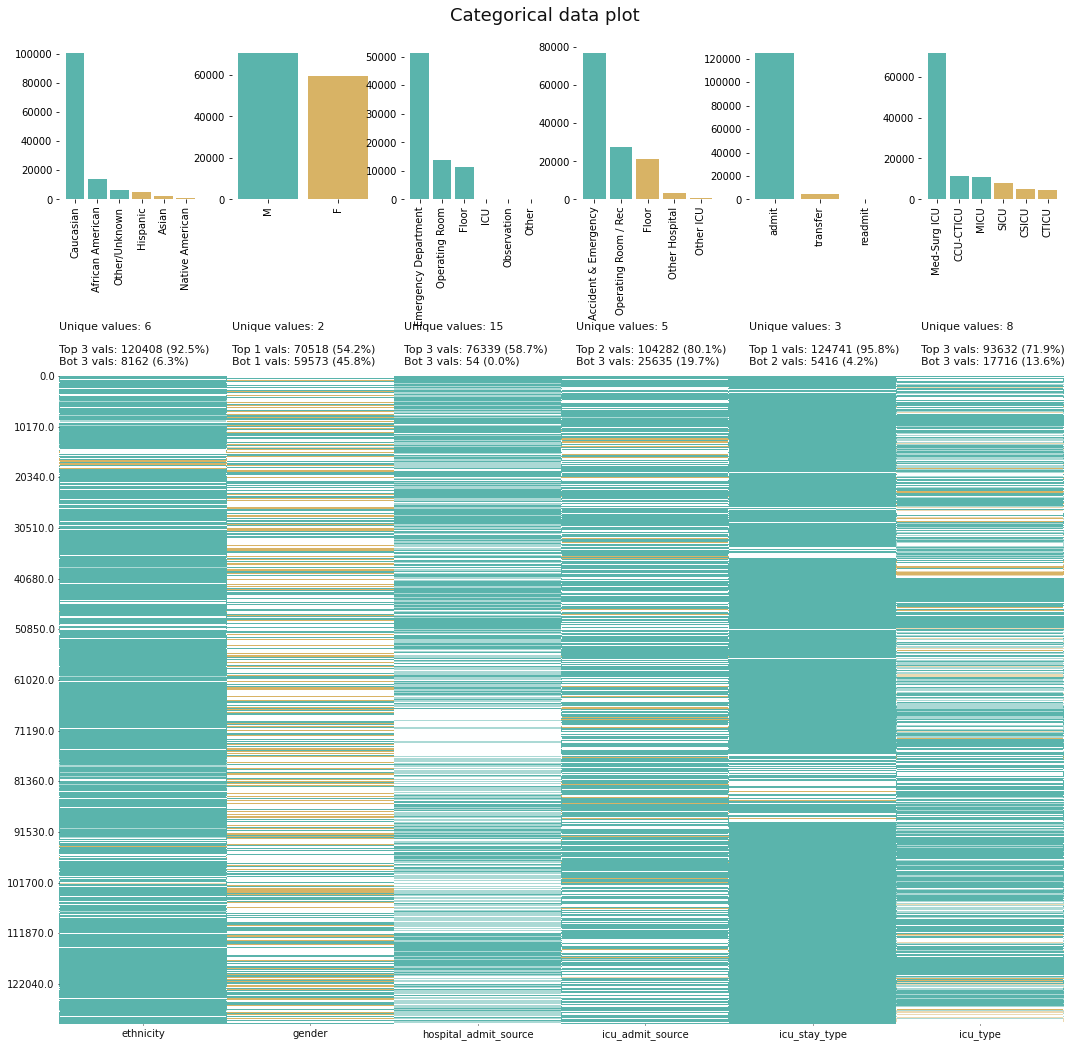

In [52]:
klib.cat_plot(df)

In [53]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]]).iloc[:,-1:]
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop(feature_to_encode, axis=1)
    return(res)

cat_cols = df.dtypes[df.dtypes == 'object'].index
for col in cat_cols:
    df = encode_and_bind(df, col)

In [54]:
df.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus,ethnicity_Other/Unknown,gender_M,hospital_admit_source_Step-Down Unit (SDU),icu_admit_source_Other ICU,icu_stay_type_transfer,icu_type_SICU
0,214826,118,68.0,22.732803,0,180.3,92,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,246060,81,77.0,27.421875,0,160.0,90,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1,12.7,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,120.0,38.0,120.0,38.0,

#### Drop outliers (bottom .1 percentile and top 99.9 percentile values)

In [55]:
for col in df.columns:
    if df[col].dtype == np.float:
        df[col] = df[(df[col] > df[col].quantile(.001)) & (df[col] < df[col].quantile(.999))][col]

#### Drop columns with low correlation to target variable

In [56]:
corr_cutoff = 0.05
columns = ['Column', 'Correlation']
corr_df = pd.DataFrame(columns=columns)

for col in df.columns:
    corr = abs(df['diabetes_mellitus'].corr(df[col]))
    if corr > corr_cutoff:
        corr_df = corr_df.append(pd.DataFrame({'Column': [col], 'Correlation': [corr]}), ignore_index=True)

corr_df.sort_values(by=['Correlation'])

,Column,Correlation
8,sodium_apache,0.050059
48,h1_sodium_min,0.050356
47,h1_sodium_max,0.051476
28,d1_hematocrit_min,0.055753
44,h1_hematocrit_min,0.056494
7,hematocrit_apache,0.056556
9,d1_diasbp_invasive_max,0.056695
43,h1_hematocrit_max,0.057822
30,d1_sodium_min,0.058126
33,h1_calcium_max,0.058209


In [57]:
new_cols = corr_df['Column'].to_list()
new_cols.append('height')
# new_cols.append('diabetes_mellitus')
df = df[new_cols]

#### Imput missing values (MICE Forest)

In [58]:
# Create kernels. 
kernel = mf.MultipleImputedKernel(
  data=df,
  save_all_iterations=True,
  random_state=1991
)

# Run the MICE algorithm for 3 iterations on each of the datasets
kernel.mice(3,verbose=True)

Dataset 0
1  | age | bmi | weight | bun_apache | creatinine_apache | glucose_apache | hematocrit_apache | sodium_apache | d1_diasbp_invasive_max | d1_diasbp_invasive_min | d1_sysbp_invasive_max | d1_sysbp_max | d1_sysbp_noninvasive_max | h1_diasbp_invasive_max | h1_diasbp_invasive_min | h1_diasbp_min | h1_diasbp_noninvasive_min | h1_mbp_invasive_min | d1_bun_max | d1_bun_min | d1_creatinine_max | d1_creatinine_min | d1_glucose_max | d1_glucose_min | d1_hemaglobin_max | d1_hemaglobin_min | d1_hematocrit_max | d1_hematocrit_min | d1_potassium_max | d1_sodium_min | h1_bun_max | h1_bun_min | h1_calcium_max | h1_calcium_min | h1_creatinine_max | h1_creatinine_min | h1_glucose_max | h1_glucose_min | h1_hco3_max | h1_hco3_min | h1_hemaglobin_max | h1_hemaglobin_min | h1_hematocrit_max | h1_hematocrit_min | h1_potassium_max | h1_potassium_min | h1_sodium_max | h1_sodium_min | height
2  | age | bmi | weight | bun_apache | creatinine_apache | glucose_apache | hematocrit_apache | sodium_apache | 

In [59]:
# Make a multiple imputed dataset with our new data
new_data_imputed = kernel.impute_new_data(df)

In [60]:
# Return a completed dataset
new_completed_data = new_data_imputed.complete_data(0)

In [61]:
new_completed_data

,age,bmi,weight,arf_apache,bun_apache,creatinine_apache,glucose_apache,hematocrit_apache,sodium_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_sysbp_invasive_max,d1_sysbp_max,d1_sysbp_noninvasive_max,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_min,h1_diasbp_noninvasive_min,h1_mbp_invasive_min,d1_bun_max,d1_bun_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_potassium_max,d1_sodium_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,diabetes_mellitus,height,diabetes_mellitus
0,68.0,22.732803,73.9,0,31.0,2.51,168.0,27.4,134.0,46.0,32.0,122.0,131.0,131.0,47.0,41.0,63.0,63.0,66.0,31.0,30.0,2.51,2.23,168.0,109.0,8.9,8.9,27.4,27.4,4.0,134.0,23.0,27.0,7.9,7.9,2.20,2.24,131.0,117.0,22.0,23.0,9.1,9.0,27.9,28.0,3.9,3.8,135.0,136.0,1,180.3,1
1,77.0,27.421875,70.2,0,9.0,0.56,145.0,36.9,145.0,90.0,54.0,178.0,159.0,159.0,91.0,50.0,48.0,48.0,76.0,11.0,9.0,0.71,0.56,145.0,128.0,11.3,11.1,36.9,36.1,4.2,145.0,9.0,9.0,8.6,8.6,0.56,0.56,145.0,143.0,27.0,27.0,11.3,11.3,36.9,36.9,4.2,4.2,145.0,145.0,1,160.0,1
2,25.0,31.952749,95.3,0,19.0,1.31,119.0,32.5,134.0,64.0,45.0,140.0,148.0,148.0,67.0,55.0,58.0,58.0,71.0,20.0,18.0,1.36,1.19,125.0,112.0,11.3,10.1,34.4,31.9,5.3,135.0,19.0,19.0,7.3,7.5,1.24,1.20,117.0,126.0,20.0,20.0,11.2,11.2,34.6,34.6,5.1,5.3,135.0,134.0,0,172.7,0
3,81.0,22.635548,61.7,0,22.0,1.70,185.0,25.9,139.0,62.0,30.0,164.0,158.0,158.0,62.0,44.0,44.0,45.0,71.0,24.0,21.0,1.67,1.50,185.0,88.0,11.6,8.9,34.0,25.9,5.0,139.0,23.0,21.0,7.6,7.8,1.51,1.49,167.0,147.0,21.0,21.0,11.6,11.6,34.0,34.0,4.3,4.4,141.0,140.0,0,165.1,0
4,19.0,27.989210,93.0,0,13.0,0.96,277.0,32.9,138.0,89.0,48.0,175.0,147.0,147.0,104.0,61.0,68.0,68.0,68.0,10.0,11.0,1.02,0.97,327.0,180.0,12.6,10.9,35.8,33.0,4.8,138.0,10.0,10.0,8.5,8.4,1.00,1.00,286.0,311.0,20.0,19.0,12.4,12.3,36.1,36.1,4.1,4.2,138.0,138.0,0,188.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130152,50.0,29.287256,90.0,0,19.0,1.50,97.0,29.6,134.0,84.0,57.0,174.0,161.0,161.0,69.0,72.0,82.0,82.0,100.0,19.0,19.0,1.50,1.47,128.0,100.0,9.7,9.8,30.1,30.0,3.1,134.0,19.0,20.0,8.4,8.4,1.40,1.46,117.0,115.0,26.0,26.0,10.0,10.1,29.8,30.2,3.2,3.1,136.0,134.0,0,175.3,0
130153,79.0,29.653433,78.4,0,32.0,1.07,139.0,39.0,140.0,145.0,48.0,178.0,164.0,164.0,79.0,67.0,81.0,81.0,93.0,32.0,32.0,1.07,1.07,139.0,139.0,13.6,13.4,39.0,39.0,3.6,140.0,31.0,32.0,8.8,9.2,1.07,1.10,145.0,134.0,31.0,31.0,13.3,13.3,39.4,39.7,2.8,3.2,141.0,141.0,0,162.6,0
130154,73.0,32.265371,102.0,0,30.0,2.43,346.0,31.8,142.0,93.0,46.0,164.0,156.0,156.0,62.0,55.0,70.0,70.0,73.0,31.0,30.0,2.65,2.41,346.0,55.0,11.0,10.2,33.0,31.0,4.4,139.0,30.0,24.0,9.3,9.2,2.39,2.25,212.0,193.0,24.0,24.0,10.2,10.2,33.0,33.0,3.9,3.9,140.0,141.0,1,177.8,1
130155,81.0,24.408579,83.9,0,46.0,2.10,137.0,32.0,142.0,93.0,42.0,155.0,151.0,151.0,69.0,51.0,47.0,47.0,66.0,45.0,45.0,2.21,2.21,156.0,137.0,10.9,7.3,33.0,23.0,5.7,141.0,45.0,41.0,9.1,9.1,2.01,2.25,157.0,165.0,25.0,24.0,10.9,10.9,33.0,33.0,5.0,5.0,143.0,143.0,0,185.4,0


In [62]:
new_completed_data.to_csv('Imputed_Train.csv')

In [121]:
unlabeled

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,2,127112,7,NaN,56.0,21.102439,0,Caucasian,M,180.3,Emergency Department,Accident & Emergency,1105,admit,Neuro ICU,0.104167,0,68.60,3.7,301.0,405.01,0,0.0,NaN,19.0,0.67,NaN,2.0,5.0,0.0,1.0,276.0,105.0,42.0,0.0,57.0,NaN,NaN,NaN,NaN,5.0,134.0,36.6,1121.1264,0.0,4.7,NaN,NaN,74.0,51.0,74.0,51.0,100.0,78.0,NaN,NaN,86.0,60.0,86.0,60.0,20.0,8.0,100.0,96.0,NaN,NaN,121.0,79.0,121.0,79.0,37.1,36.6,NaN,NaN,55.0,51.0,55.0,51.0,88.0,84.0,NaN,NaN,68.0,60.0,68.0,60.0,18.0,8.0,100.0,98.0,NaN,NaN,91.0,79.0,91.0,79.0,36.6,36.6,3.7,3.7,NaN,NaN,19.0,19.0,9.3,9.3,0.67,0.67,276.0,167.0,24.0,24.0,13.8,13.8,42.0,42.0,NaN,NaN,NaN,NaN,223.0,223.0,4.8,4.8,135.0,134.0,4.7,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.13,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
1,5,130737,178,NaN,NaN,19.500595,1,Caucasian,F,145.0,Operating Room,Operating

#### SMOTE Oversampling (to balance target classes)

In [63]:
imputed_train = pd.read_csv('Imputed_Train.csv')
imputed_train = imputed_train.drop(columns=['Unnamed: 0'])

In [64]:
imputed_train.head()

,age,bmi,weight,arf_apache,bun_apache,creatinine_apache,glucose_apache,hematocrit_apache,sodium_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_sysbp_invasive_max,d1_sysbp_max,d1_sysbp_noninvasive_max,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_min,h1_diasbp_noninvasive_min,h1_mbp_invasive_min,d1_bun_max,d1_bun_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_potassium_max,d1_sodium_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,diabetes_mellitus,height,diabetes_mellitus.1
0,68.0,22.732803,73.9,0,31.0,2.51,168.0,27.4,134.0,46.0,32.0,122.0,131.0,131.0,47.0,41.0,63.0,63.0,66.0,31.0,30.0,2.51,2.23,168.0,109.0,8.9,8.9,27.4,27.4,4.0,134.0,23.0,27.0,7.9,7.9,2.20,2.24,131.0,117.0,22.0,23.0,9.1,9.0,27.9,28.0,3.9,3.8,135.0,136.0,1,180.3,1
1,77.0,27.421875,70.2,0,9.0,0.56,145.0,36.9,145.0,90.0,54.0,178.0,159.0,159.0,91.0,50.0,48.0,48.0,76.0,11.0,9.0,0.71,0.56,145.0,128.0,11.3,11.1,36.9,36.1,4.2,145.0,9.0,9.0,8.6,8.6,0.56,0.56,145.0,143.0,27.0,27.0,11.3,11.3,36.9,36.9,4.2,4.2,145.0,145.0,1,160.0,1
2,25.0,31.952749,95.3,0,19.0,1.31,119.0,32.5,134.0,64.0,45.0,140.0,148.0,148.0,67.0,55.0,58.0,58.0,71.0,20.0,18.0,1.36,1.19,125.0,112.0,11.3,10.1,34.4,31.9,5.3,135.0,19.0,19.0,7.3,7.5,1.24,1.20,117.0,126.0,20.0,20.0,11.2,11.2,34.6,34.6,5.1,5.3,135.0,134.0,0,172.7,0
3,81.0,22.635548,61.7,0,22.0,1.70,185.0,25.9,139.0,62.0,30.0,164.0,158.0,158.0,62.0,44.0,44.0,45.0,71.0,24.0,21.0,1.67,1.50,185.0,88.0,11.6,8.9,34.0,25.9,5.0,139.0,23.0,21.0,7.6,7.8,1.51,1.49,167.0,147.0,21.0,21.0,11.6,11.6,34.0,34.0,4.3,4.4,141.0,140.0,0,165.1,0
4,19.0,27.989210,93.0,0,13.0,0.96,277.0,32.9,138.0,89.0,48.0,175.0,147.0,147.0,104.0,61.0,68.0,68.0,68.0,10.0,11.0,1.02,0.97,327.0,180.0,12.6,10.9,35.8,33.0,4.8,138.0,10.0,10.0,8.5,8.4,1.00,1.00,286.0,311.0,20.0,19.0,12.4,12.3,36.1,36.1,4.1,4.2,138.0,138.0,0,188.0,0


In [80]:
X = imputed_train.drop(columns=['diabetes_mellitus','diabetes_mellitus.1'])
y = imputed_train['diabetes_mellitus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [81]:
y.value_counts()

0    102006
1     28151
Name: diabetes_mellitus, dtype: int64

In [82]:
len(X), len(y)

(130157, 130157)

In [83]:
oversample = SMOTE()
X_oversample, y_oversample = oversample.fit_resample(X_train, y_train)

In [84]:
y_oversample.value_counts()

1    68403
0    68403
Name: diabetes_mellitus, dtype: int64

In [85]:
len(X_oversample), len(y_oversample)

(136806, 136806)

In [86]:
imputed_resampled_df = X_oversample.merge(y_oversample, left_index=True, right_index=True)

In [87]:
imputed_resampled_df.to_csv('Imputed_Resampled_Train.csv')

#### Modeling

In [95]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score

In [160]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [158]:
X_train, X_test, Y_train, Y_test = train_test_split(X_oversample, y_oversample, test_size=0.2)

In [99]:
D_train = xgb.DMatrix(X_train, label=Y_train)
D_test = xgb.DMatrix(X_test, label=Y_test)

In [100]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations

In [101]:
model = xgb.train(param, D_train, steps)

In [102]:
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(Y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(Y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, best_preds)))
print("ROC AUC = {}".format(roc_auc_score(Y_test, best_preds)))

Precision = 0.7816567062158792
Recall = 0.7807272882231853
Accuracy = 0.7807543308237702
ROC AUC = 0.7807272882231853


In [162]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train, Y_train)

preds = model.predict(X_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(Y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(Y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, best_preds)))
print("ROC AUC = {}".format(roc_auc_score(Y_test, best_preds)))

Precision = 0.39195989551321453
Recall = 0.5
Accuracy = 0.7839197910264291
ROC AUC = 0.5


c:\users\alo19\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:
# Create kernels. 
kernel = mf.MultipleImputedKernel(
  data=unlabeled[X_test.columns],
  save_all_iterations=True,
  random_state=1991
)

# Run the MICE algorithm for 3 iterations on each of the datasets
kernel.mice(3,verbose=True)

Dataset 0
1  | bmi | weight | bun_apache | creatinine_apache | glucose_apache | hematocrit_apache | sodium_apache | d1_diasbp_invasive_max | d1_diasbp_invasive_min | d1_sysbp_invasive_max | d1_sysbp_max | d1_sysbp_noninvasive_max | h1_diasbp_invasive_max | h1_diasbp_invasive_min | h1_diasbp_min | h1_diasbp_noninvasive_min | h1_mbp_invasive_min | d1_bun_max | d1_bun_min | d1_creatinine_max | d1_creatinine_min | d1_glucose_max | d1_glucose_min | d1_hemaglobin_max | d1_hemaglobin_min | d1_hematocrit_max | d1_hematocrit_min | d1_potassium_max | d1_sodium_min | h1_bun_max | h1_bun_min | h1_calcium_max | h1_calcium_min | h1_creatinine_max | h1_creatinine_min | h1_glucose_max | h1_glucose_min | h1_hco3_max | h1_hco3_min | h1_hemaglobin_max | h1_hemaglobin_min | h1_hematocrit_max | h1_hematocrit_min | h1_potassium_max | h1_potassium_min | h1_sodium_max | h1_sodium_min | height
2  | bmi | weight | bun_apache | creatinine_apache | glucose_apache | hematocrit_apache | sodium_apache | d1_diasbp_in

In [142]:
# Make a multiple imputed dataset with our new data
new_data_imputed = kernel.impute_new_data(unlabeled[X_test.columns])

In [143]:
# Return a completed dataset
new_completed_data = new_data_imputed.complete_data(0)

In [148]:
new_completed_data.to_csv('Unlabeled_Imputed.csv')

In [144]:
# new_completed_data = unlabeled[X_test.columns]

D_unlabeled = xgb.DMatrix(new_completed_data)
preds_unlabeled = model.predict(D_unlabeled)
best_preds_unlabeled = np.asarray([np.argmax(line) for line in preds_unlabeled])

In [145]:
output_df = pd.concat([unlabeled['encounter_id'], pd.Series(best_preds_unlabeled)], axis=1, ignore_index=True)
output_df.columns = ['encounter_id','diabetes_mellitus']

In [147]:
output_df.to_csv('output.csv', index=False)